In [1]:
import numpy as np
import pandas as pd 

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
df = pd.read_csv('train.csv',usecols = ['Age','Fare','Survived'])

In [4]:
df.sample(5)

,Survived,Age,Fare
354,0,NaN,7.2250
51,0,21.0,7.8000
502,0,NaN,7.6292
509,1,26.0,56.4958
461,0,34.0,8.0500


In [5]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [6]:
X = df.drop(columns = ['Survived'])
y = df['Survived']                       

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [9]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_train['Age']

In [10]:
X_train.sample(4)

,Age,Fare,Age_imputed
225,22.0,9.3500,22.0
552,NaN,7.8292,NaN
661,40.0,7.2250,40.0
351,NaN,35.0000,NaN


In [16]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values


ValueError: cannot set using a list-like indexer with a different length than the value

In [17]:
X_train.isnull().sum()

Age            148
Fare             0
Age_imputed      0
dtype: int64

In [18]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([39.  , 50.  , 50.  , 31.  , 21.  ,  2.  , 34.  , 47.  , 29.  ,
       47.  , 54.  , 42.  , 16.  , 22.  , 17.  , 44.  , 24.  , 22.  ,
       12.  , 21.  , 58.  , 18.  , 32.  , 44.  , 29.  , 22.  , 29.  ,
       35.  , 51.  , 36.  , 35.  , 40.5 , 18.  , 29.  ,  5.  , 71.  ,
       24.  , 19.  ,  2.  , 27.  , 25.  , 38.  , 53.  , 17.  , 21.  ,
       27.  , 16.  , 34.  ,  3.  , 28.  , 48.  , 43.  ,  7.  , 23.  ,
       20.  ,  0.67, 60.  , 26.  , 28.  , 60.  ,  9.  , 29.  , 24.  ,
       61.  , 41.  , 65.  , 34.  , 16.  , 45.  , 27.  , 47.  , 40.  ,
       20.  , 35.  , 27.  , 25.  , 36.  , 47.  , 38.  , 57.  , 23.  ,
       33.  , 44.  , 42.  ,  9.  , 45.  ,  3.  , 28.  , 20.  , 42.  ,
       32.  , 20.  , 13.  , 23.  , 19.  , 33.  , 26.  , 22.  , 18.  ,
       25.  , 18.  , 14.  , 27.  , 23.  , 40.  , 27.  , 62.  , 40.  ,
       25.  , 22.  ,  5.  , 38.  , 34.5 , 41.  , 26.  , 58.  , 39.  ,
       33.  , 34.  , 28.  , 36.  , 27.  , 16.  , 45.  , 23.  , 30.  ,
        4.  , 51.  ,

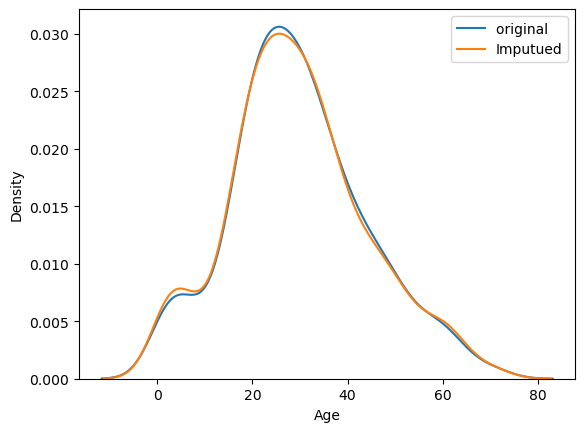

In [38]:
# plot between age and imputed age 
sns.kdeplot(X_train['Age'],label = "original ")
sns.kdeplot(X_train['Age_imputed'],label = "Imputued")
plt.legend()
plt.show()

In [40]:
print('Original variable variance: ', X_train['Age'].var())
print('Imputed variable variance: ', X_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Imputed variable variance:  209.7928214154775


In [42]:
X_train[['Fare','Age','Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,60.653672
Age,71.512440,204.349513,204.349513
Age_imputed,60.653672,204.349513,209.792821


<Axes: >

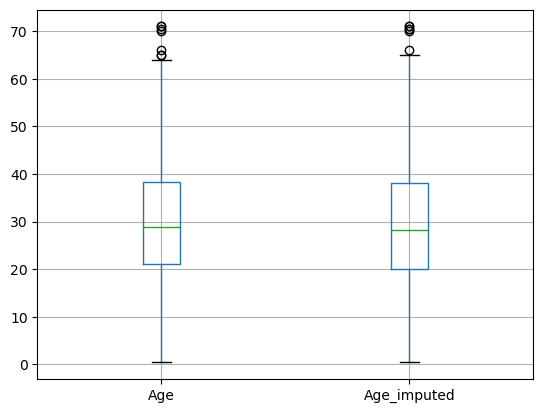

In [43]:
X_train[['Age','Age_imputed']].boxplot()

In [45]:
# sampled_value = X_train['Age'].dropna().sample(1,random_state = int(observation['Fare']))
sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

NameError: name 'observation' is not defined

In [48]:
data = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [49]:
data.sample()

,FireplaceQu,GarageQual,SalePrice
136,Fa,TA,143000


In [51]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [83]:
X = data
y = data['SalePrice']

In [84]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [85]:
X_train

,FireplaceQu,GarageQual,SalePrice
455,TA,TA,175500
863,NaN,TA,132500
504,Fa,TA,147000
1413,Gd,TA,257000
1389,Gd,TA,131000
...,...,...,...
466,Po,TA,167000
299,Gd,TA,158500
493,Fa,TA,155000
527,Gd,TA,446261


In [86]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

In [87]:
X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']


In [88]:
X_train

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
455,TA,TA,175500,TA,TA
863,NaN,TA,132500,TA,NaN
504,Fa,TA,147000,TA,Fa
1413,Gd,TA,257000,TA,Gd
1389,Gd,TA,131000,TA,Gd
...,...,...,...,...,...
466,Po,TA,167000,TA,Po
299,Gd,TA,158500,TA,Gd
493,Fa,TA,155000,TA,Fa
527,Gd,TA,446261,TA,Gd


In [89]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual_imputed'].dropna().sample(X_train['GarageQual'].isnull().sum()).values                           

C:\Users\sharm\AppData\Local\Temp\ipykernel_4728\2621725597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual_imputed'].dropna().sample(X_train['GarageQual'].isnull().sum()).values


In [90]:
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_test['GarageQual_imputed'].dropna().sample(X_test['GarageQual_imputed'].isnull().sum()).values                                      

C:\Users\sharm\AppData\Local\Temp\ipykernel_4728\4233052551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_test['GarageQual_imputed'].dropna().sample(X_test['GarageQual_imputed'].isnull().sum()).values


In [91]:
X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()]=X_train['FireplaceQu_imputed'].dropna().sample(X_train['FireplaceQu_imputed'].isnull().sum()).values 

C:\Users\sharm\AppData\Local\Temp\ipykernel_4728\4060244639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()]=X_train['FireplaceQu_imputed'].dropna().sample(X_train['FireplaceQu_imputed'].isnull().sum()).values


In [92]:
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()]=X_test['FireplaceQu_imputed'].dropna().sample(X_test['FireplaceQu_imputed'].isnull().sum()).values 

C:\Users\sharm\AppData\Local\Temp\ipykernel_4728\3701387530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()]=X_test['FireplaceQu_imputed'].dropna().sample(X_test['FireplaceQu_imputed'].isnull().sum()).values


In [93]:
temp = pd.concat(
[
    X_train['GarageQual'].value_counts()/len(X_train['GarageQual'].dropna()),
    X_train['GarageQual_imputed'].value_counts()/len(X_train)
], axis = 1)

temp.columns = ['original','imputed']

In [94]:
X_train['GarageQual'].value_counts()

GarageQual
TA    1049
Fa      41
Gd      11
Po       1
Ex       1
Name: count, dtype: int64

In [95]:
len(X_train['GarageQual'].dropna())

1103

In [96]:
print(X_train['GarageQual'].value_counts()/len(X_train['GarageQual'].dropna())*100)

GarageQual
TA    95.104261
Fa     3.717135
Gd     0.997280
Po     0.090662
Ex     0.090662
Name: count, dtype: float64


In [97]:
temp

,original,imputed
TA,0.951043,0.951199
Fa,0.037171,0.036815
Gd,0.009973,0.010274
Po,0.000907,0.000856
Ex,0.000907,0.000856


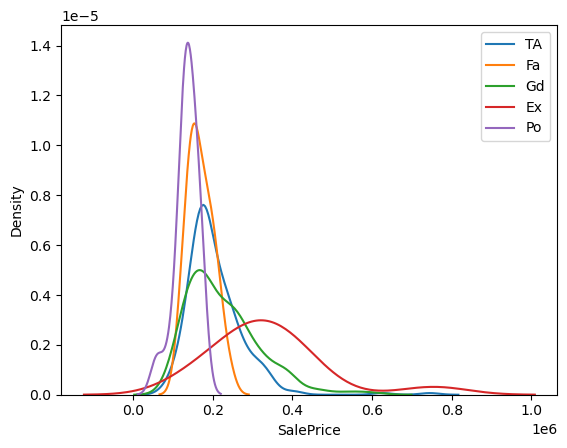

In [99]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],label=category)
plt.legend()    
plt.show()

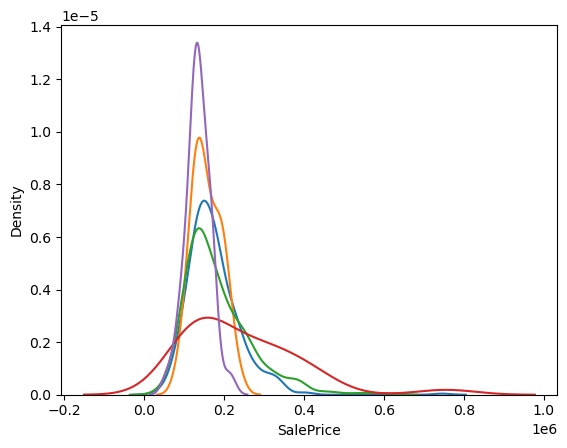

In [100]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu_imputed']==category]['SalePrice'])